## PHASE 3

In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [3]:
# Import SQL Results and store them in a DataFrame
Data3=pd.read_csv(r"C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Capstone Project\India_Crime\SQLResults.csv",sep=";")
Data3.head()

,DISTRICT,YEAR,STATE UT,MURDER_MAX
0,DELHI UT TOTAL,2010,DELHI UT,565
1,DELHI UT TOTAL,2008,DELHI UT,554
2,DELHI UT TOTAL,2009,DELHI UT,552
3,DELHI UT TOTAL,2001,DELHI UT,547
4,DELHI UT TOTAL,2011,DELHI UT,543


In [4]:
# Identify Districts that appear 3 or more than 3 years
D3=Data3[Data3.groupby('DISTRICT')['DISTRICT'].transform('size') > 3].sort_values(by=['YEAR'],ascending=False)

In [5]:
D3.reset_index()
D3.head()

,DISTRICT,YEAR,STATE UT,MURDER_MAX
2700,BELLARY,2012,KARNATAKA,54
5776,SAWAI MADHOPUR,2012,RAJASTHAN,24
4203,JAIPUR RURAL,2012,RAJASTHAN,38
7555,AHWA-DANG,2012,GUJARAT,7
7552,D and N HAVELI,2012,D & N HAVELI,7


In [22]:
# Check number of Districts

len(D3['DISTRICT'].unique())

736

### 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

Considering that there are 736 Districts, I will select the top highest and lowest for the analysis.

In [23]:
# Check the dimensions of the dataset
D3.shape

(8483, 4)

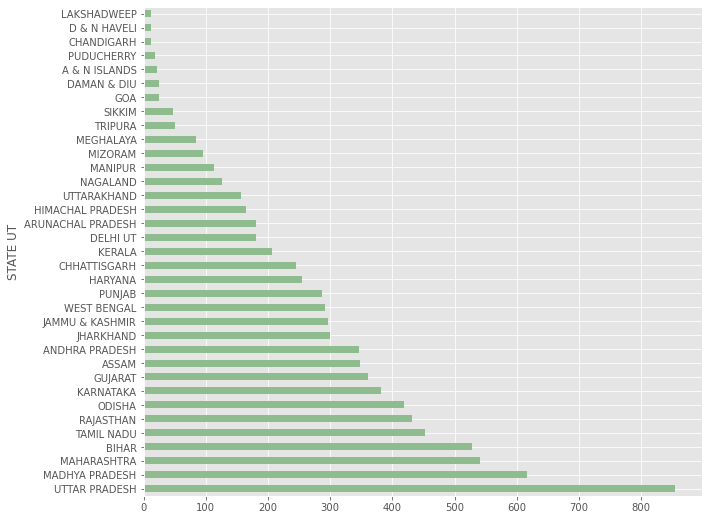

In [71]:
fig,ax =plt.subplots(figsize=(10,9))
grouped=D3[['STATE UT','DISTRICT']].groupby('STATE UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="darkseagreen")

If we consider all districts, UTTAR PRADESH and MADHYA PRADESH are the States with Districts where max murders have been reported. On the contrary, LAKSHADWEEP, D&N HAVELI and CHANDIGARH, have the lower amount of Districts with max murders.

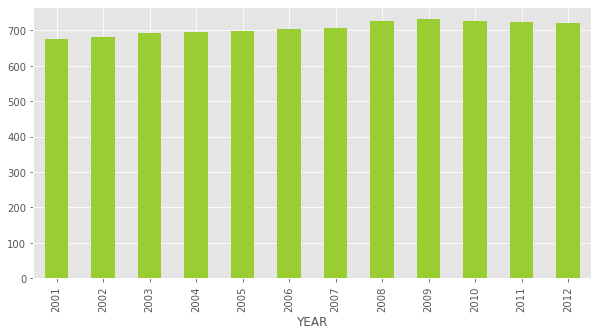

In [110]:
fig,ax =plt.subplots(figsize=(10,5))
grouped=D3[['YEAR','STATE UT']].groupby('YEAR').size().plot(kind='bar',ax=ax,color="yellowgreen")

According to the data, the number of max murders has been increasing at a slower pace from 2001 to 2009 and then started to decrease at a slower pace until 2012.

## Explore the top highest and lowest Districts with max murders.

### Top highest Dictricts with Max Murders

In [92]:
# Sort vakues in descending order and select the top highest and the top lowest 
D3 = D3.sort_values(by = ["MURDER_MAX"], ascending = False)
D3Top10=D3[0:50]
D3Low10=D3[8000:8319]

In [95]:
#D3Low10

In [29]:
#D3_WIDE= D3.pivot_table(index="YEAR",columns="DISTRICT", values="MURDER_MAX")
#D3_WIDE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'DELHI UT TOTAL'),
  Text(1, 0, 'PATNA'),
  Text(2, 0, 'MUZAFFARNAGAR'),
  Text(3, 0, 'MUMBAI'),
  Text(4, 0, 'MEERUT'),
  Text(5, 0, 'BAREILLY'),
  Text(6, 0, 'RANCHI'),
  Text(7, 0, 'PASCHIM MIDNAPUR'),
  Text(8, 0, 'BANGALORE COMMR.'),
  Text(9, 0, '24 PARGANAS SOUTH'),
  Text(10, 0, 'GHAZIABAD'),
  Text(11, 0, 'BULANDSHAHAR'),
  Text(12, 0, '24 PARGANAS NORTH')])

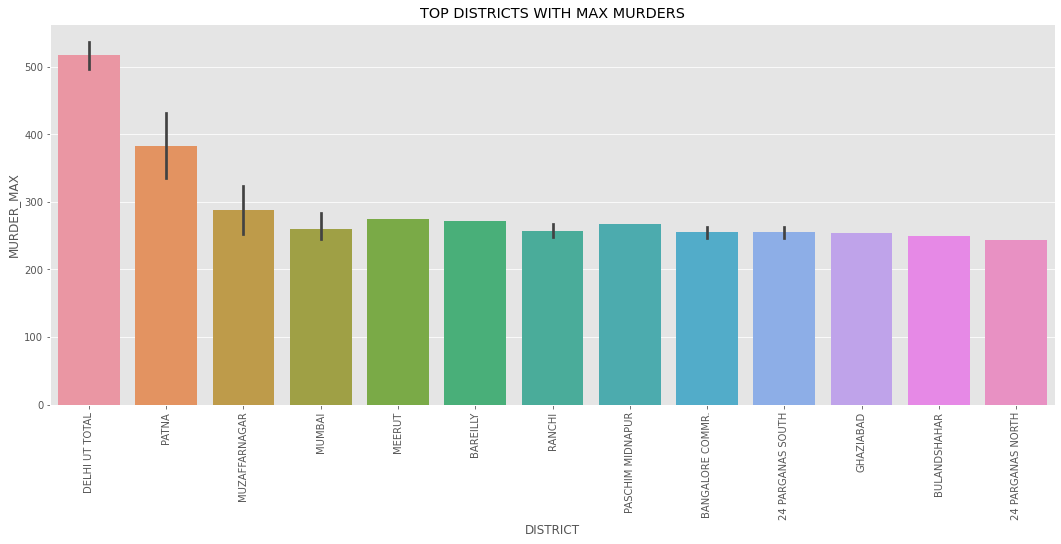

In [30]:
plt.figure(figsize=(18,7),facecolor="white")
sns.barplot(x = D3Top10['DISTRICT'], y = D3Top10["MURDER_MAX"]).set(title = "TOP DISTRICTS WITH MAX MURDERS")
plt.xticks(rotation = 90)

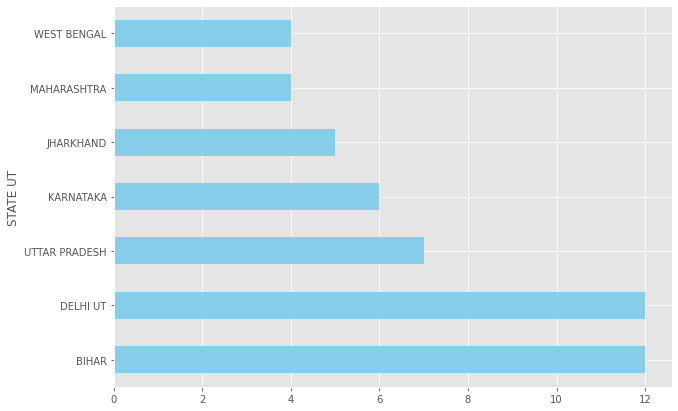

In [70]:
# Check which are the States with the highest number of max murders on the basis of their Districts

fig,ax =plt.subplots(figsize=(10,7))
grouped=D3Top10[['STATE UT','DISTRICT']].groupby('STATE UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

BIHAR and DELHI UT are the States with the top districts where maximum murders have been reported.

### Lowest max murders registered per District

In [12]:
## Districts with 0 Murders registered
D0M=D3.loc[D3["MURDER_MAX"]==0]
D0M.sort_values(by=['DISTRICT'],ascending=False)

,DISTRICT,YEAR,STATE UT,MURDER_MAX
8604,ZUNHEBOTO,2008,NAGALAND,0
8507,VIJAYAWADA RLY.,2003,ANDHRA PRADESH,0
8515,UPPER DIBANG VALLEY,2009,ARUNACHAL PRADESH,0
8517,UPPER DIBANG VALLEY,2011,ARUNACHAL PRADESH,0
8518,UPPER DIBANG VALLEY,2012,ARUNACHAL PRADESH,0
8514,UPPER DIBANG VALLEY,2006,ARUNACHAL PRADESH,0
8516,UPPER DIBANG VALLEY,2010,ARUNACHAL PRADESH,0
8607,TUENSANG,2009,NAGALAND,0
8575,TRICHY RLY.,2003,TAMIL NADU,0
8571,TRICHY RLY.,2009,TAMIL NADU,0


In [97]:
# Check 0 murders data dimensions
D0M.shape

(164, 4)

There are 164 Districts with no murders registered.

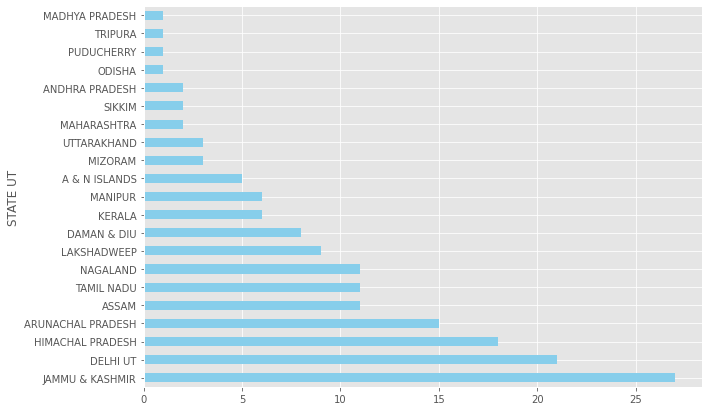

In [101]:
# Check which are the States with no max murders on the basis of their Districts

fig,ax =plt.subplots(figsize=(10,7))
grouped=D0M[['STATE UT','DISTRICT']].groupby('STATE UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

JAMMU & KASHMIR and DELHI UT are the States with the highest amount of Districts with no max murders.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 [Text(0, 0, 'LAWNGTLAI'),
  Text(1, 0, 'SRP(CUTTACK)'),
  Text(2, 0, 'JABALPUR RLY.'),
  Text(3, 0, 'INDORE RLY.'),
  Text(4, 0, 'RUDRA PRAYAG'),
  Text(5, 0, 'CHANGLANG'),
  Text(6, 0, 'SAIHA'),
  Text(7, 0, 'GARO HILLS SOUTH'),
  Text(8, 0, 'LEH'),
  Text(9, 0, 'KUPWARA'),
  Text(10, 0, 'KAMENG WEST'),
  Text(11, 0, 'TAMENGLONG'),
  Text(12, 0, 'WEST'),
  Text(13, 0, 'VIJAYAWADA RLY.'),
  Text(14, 0, 'TAWANG'),
  Text(15, 0, 'NAGPUR RLY.'),
  Text(16, 0, 'KAMENG EAST'),
  Text(17, 0, 'SIRMAUR'),
  Text(18, 0, 'KOLASIB'),
  Text(19, 0, 'PITHORAGARH'),
  Text(20,

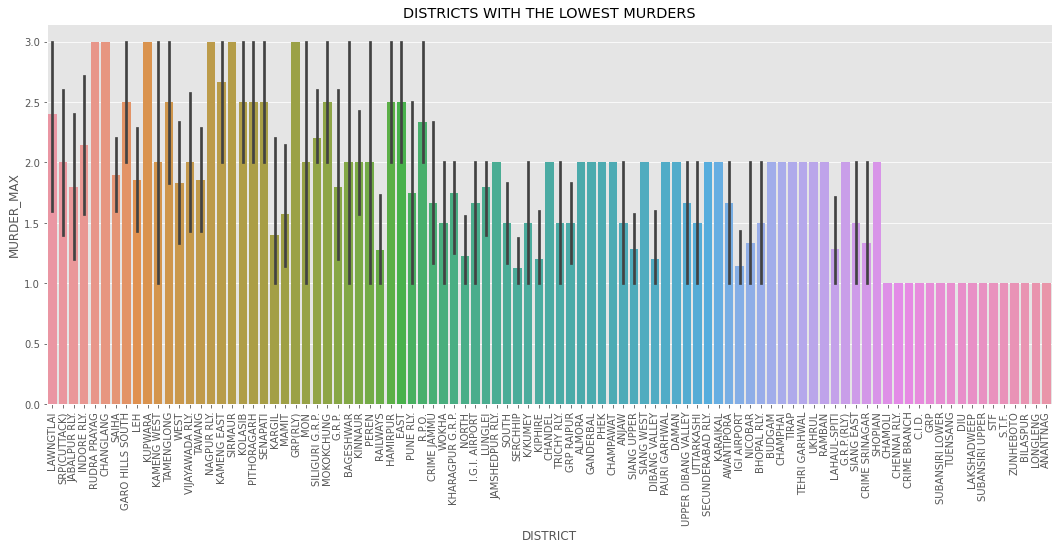

In [94]:
# Check lowest max murders per District, where values are not 0.

D3Low10.sort_values(by=["MURDER_MAX"],ascending=False)
plt.figure(figsize=(18,7),facecolor="white")
sns.barplot(x = D3Low10['DISTRICT'], y = D3Low10["MURDER_MAX"]).set(title = "DISTRICTS WITH THE LOWEST MURDERS")
plt.xticks(rotation = 90)

In [99]:
# Check the dimensions of the data with the lowest max murders per districts where value is not equal to 0.
D3Low10.shape

(319, 4)

There are 319, districts as shown in the graph above, where maximum murders are between 3 and 1.

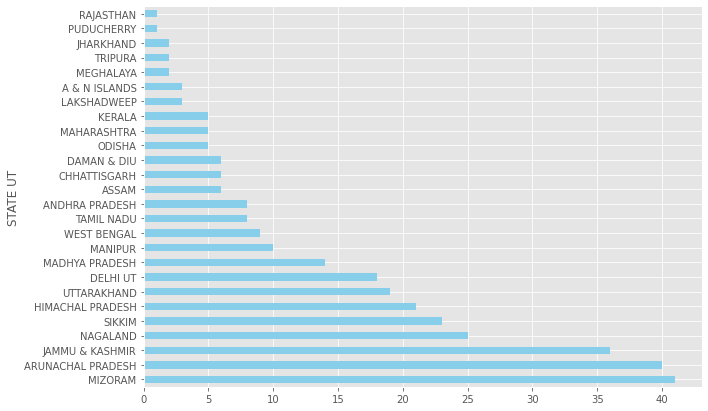

In [100]:
# Check which are the States with the lowest number of max murders on the basis of their Districts

fig,ax =plt.subplots(figsize=(10,7))
grouped=D3Low10[['STATE UT','DISTRICT']].groupby('STATE UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

MIZORAM and ARUNACHAL PRADESH are the States with the highest amount of Districts with the lowest max murders.